In [1]:
from helpers import *
from constants import *
from optimizer import Optimizer
import random

In [22]:
export_results('results_2020_05_27 20_54_37')

In [3]:
# Enable inline plots
%matplotlib inline
pd.set_option("display.width", 70)
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [4]:
dataset = preprocess_dataset()

In [5]:
pairs = get_pairs_count(dataset)

# ЙЦУКЕН

In [6]:
qwerty_thumbs_distance = get_thumbs_distance(
    pairs=pairs, 
    layout=QWERTY, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key='no-cache' # get_cache_key([QWERTY, THUMBS, COORDS])
)

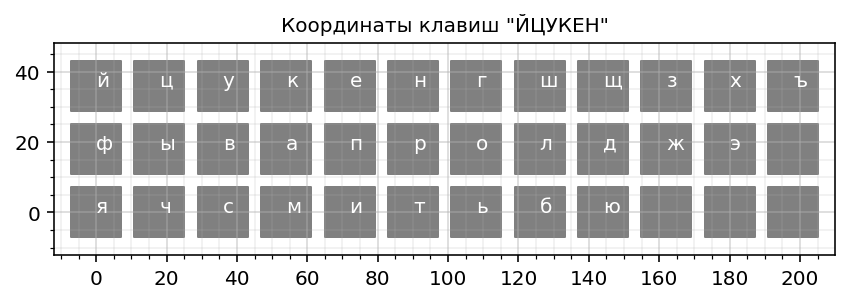

In [7]:
get_keyboard(
    coords=COORDS, 
    layout=QWERTY, 
    title='Координаты клавиш "ЙЦУКЕН"'
)

In [8]:
qwerty_distances = [
    pair_values["total_distance"]
    for thumb, thumb_values in qwerty_thumbs_distance.items()
    for pair, pair_values in thumb_values["pairs"].items()
]

In [9]:
qwerty_max = max(qwerty_distances)
qwerty_sum = sum(qwerty_distances)
qwerty_avg = qwerty_sum / len(qwerty_distances)

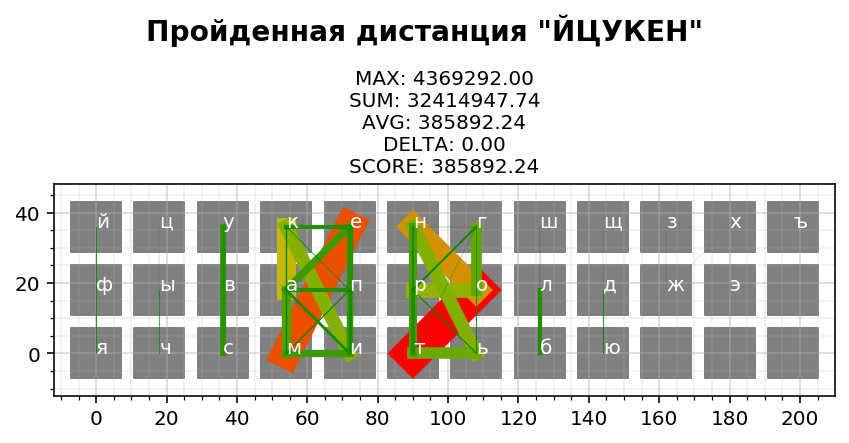

In [10]:
get_distance_map(
    thumbs_distance=qwerty_thumbs_distance, 
    max_distance=qwerty_max, 
    coords=COORDS, 
    layout=QWERTY, 
    title='Пройденная дистанция "ЙЦУКЕН"',
    subtitle=f"MAX: {qwerty_max:.2f}\n"
             f"SUM: {qwerty_sum:.2f}\n"
             f"AVG: {qwerty_avg:.2f}\n"
             f"DELTA: 0.00\n"
             f"SCORE: {qwerty_avg:.2f}"
)

# Диктор

In [11]:
diktor_thumbs_distance = get_thumbs_distance(
    pairs=pairs, 
    layout=DIKTOR, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key='no-cache' # get_cache_key([DIKTOR, THUMBS, COORDS])
)

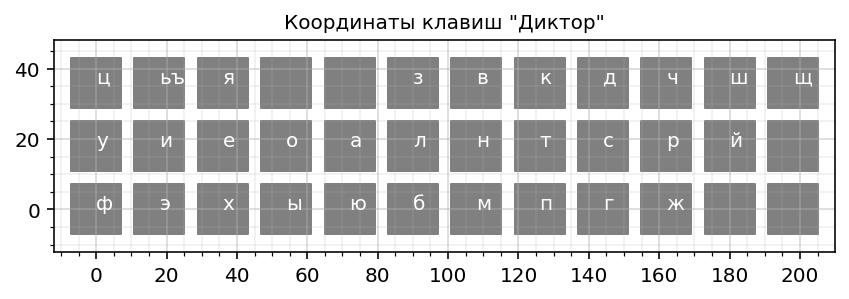

In [12]:
get_keyboard(
    coords=COORDS, 
    layout=DIKTOR, 
    title='Координаты клавиш "Диктор"'
)

In [13]:
diktor_distances = [
    pair_values["total_distance"]
    for thumb, thumb_values in diktor_thumbs_distance.items()
    for pair, pair_values in thumb_values["pairs"].items()
]

In [14]:
diktor_max = max(diktor_distances)
diktor_sum = sum(diktor_distances)
diktor_avg = diktor_sum / len(diktor_distances)
diktor_delta = layout_delta_distance(
    layout_a=QWERTY, 
    layout_b=DIKTOR, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key='no-cache' # get_cache_key([QWERTY, DIKTOR, THUMBS, COORDS])
)
diktor_score = diktor_avg + diktor_delta

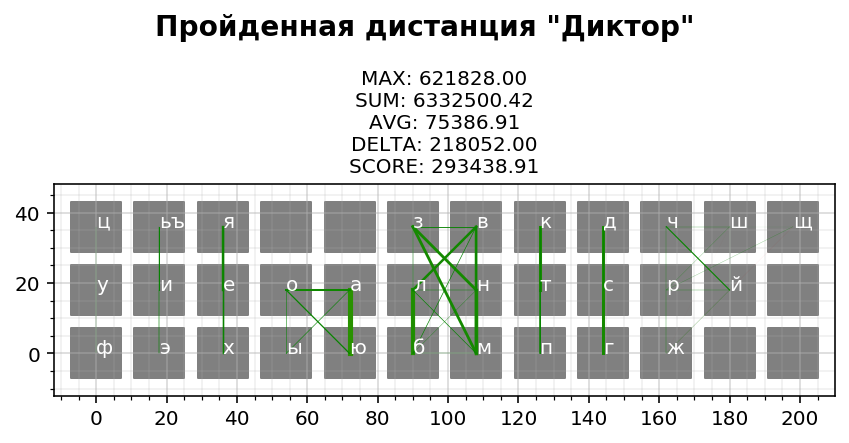

In [15]:
get_distance_map(
    thumbs_distance=diktor_thumbs_distance, 
    max_distance=qwerty_max, 
    coords=COORDS, 
    layout=DIKTOR, 
    title='Пройденная дистанция "Диктор"',
    subtitle=f"MAX: {diktor_max:.2f}\n"
             f"SUM: {diktor_sum:.2f}\n"
             f"AVG: {diktor_avg:.2f}\n"
             f"DELTA: {diktor_delta:.2f}\n"
             f"SCORE: {diktor_score:.2f}"
)

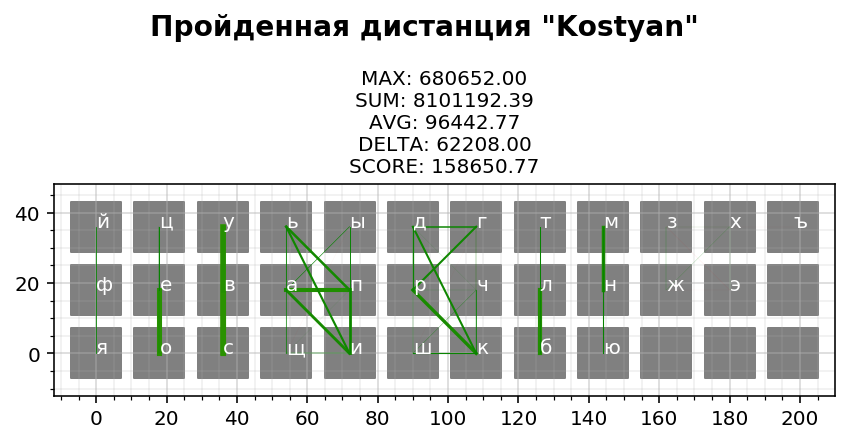

In [16]:
kostyan_thumbs_distance = get_thumbs_distance(
    pairs=pairs, 
    layout=KOSTYAN, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key='no-cache' # get_cache_key([KOSTYAN, THUMBS, COORDS])
)
kostyan_distances = [
    pair_values["total_distance"]
    for thumb, thumb_values in kostyan_thumbs_distance.items()
    for pair, pair_values in thumb_values["pairs"].items()
]
kostyan_max = max(kostyan_distances)
kostyan_sum = sum(kostyan_distances)
kostyan_avg = kostyan_sum / len(kostyan_distances)
kostyan_delta = layout_delta_distance(
    layout_a=QWERTY, 
    layout_b=KOSTYAN, 
    thumbs=THUMBS, 
    coords=COORDS, 
    cache_key='no-cache' # get_cache_key([QWERTY, KOSTYAN, THUMBS, COORDS])
)
kostyan_score = kostyan_avg + kostyan_delta
get_distance_map(
    thumbs_distance=kostyan_thumbs_distance, 
    max_distance=qwerty_max, 
    coords=COORDS, 
    layout=KOSTYAN, 
    title='Пройденная дистанция "Kostyan"',
    subtitle=f"MAX: {kostyan_max:.2f}\n"
             f"SUM: {kostyan_sum:.2f}\n"
             f"AVG: {kostyan_avg:.2f}\n"
             f"DELTA: {kostyan_delta:.2f}\n"
             f"SCORE: {kostyan_score:.2f}"
)

In [17]:
# test_layout = deepcopy(QWERTY)
# for i in range(12):
#     best_variant = test_layouts(get_column_layouts(test_layout, i))[0]
#     best_layout = best_variant["layout"]
#     test_layout = deepcopy(best_layout)
# for i in range(3):
#     best_variant = test_layouts(get_left_row_layouts(test_layout, i))[0]
#     best_layout = best_variant["layout"]
#     test_layout = deepcopy(best_layout)
# for i in range(3):  
#     best_variant = test_layouts(get_right_row_layouts(test_layout, i))[0]  
#     best_layout = best_variant["layout"]
#     test_layout = deepcopy(best_layout)

# get_distance_map(
#     thumbs_distance=best_variant["thumbs_distance"],
#     max_distance=qwerty_max,
#     coords=COORDS,
#     layout=best_variant["layout"],
#     title=f"ЛУЧШИЙ ВАРИАНТ",
#     subtitle=f"MAX: {best_variant['max']:.2f}\n"
#              f"SUM: {best_variant['sum']:.2f}\n"
#              f"AVG: {best_variant['avg']:.2f}\n"
#              f"DELTA: {best_variant['delta']:.2f}"
# )


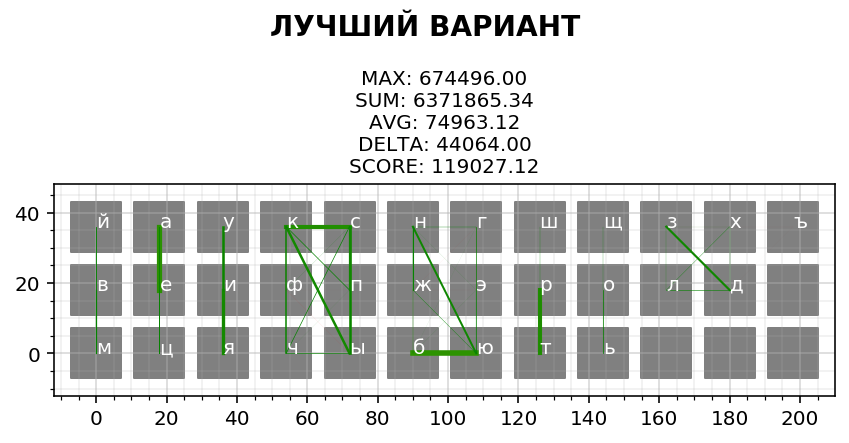

In [18]:
test_layout = deepcopy(QWERTY)
iteration_index = 0
O = Optimizer()

while True:
    action = random.randint(0,2)
    if action == 0:
        col = random.randint(0, 11)
        sorted_variants = test_layouts(get_column_layouts(test_layout, col))
    if action == 1:
        row = random.randint(0, 2)
        sorted_variants = test_layouts(get_left_row_layouts(test_layout, row))
    if action == 2:
        row = random.randint(0, 2)
        sorted_variants = test_layouts(get_right_row_layouts(test_layout, row))

    test_layout, end_simulation = O.old(
        iteration_index=iteration_index, 
        sorted_variants=sorted_variants
    )

    if end_simulation:
        best_variant = test_layout
        break
    
    iteration_index += 1

save_results(O.results)

get_distance_map(
    thumbs_distance=best_variant["thumbs_distance"],
    max_distance=qwerty_max,
    coords=COORDS,
    layout=best_variant["layout"],
    title=f"ЛУЧШИЙ ВАРИАНТ",
    subtitle=f"MAX: {best_variant['max']:.2f}\n"
             f"SUM: {best_variant['sum']:.2f}\n"
             f"AVG: {best_variant['avg']:.2f}\n"
             f"DELTA: {best_variant['delta']:.2f}\n"
             f"SCORE: {best_variant['avg'] + best_variant['delta']:.2f}"
)

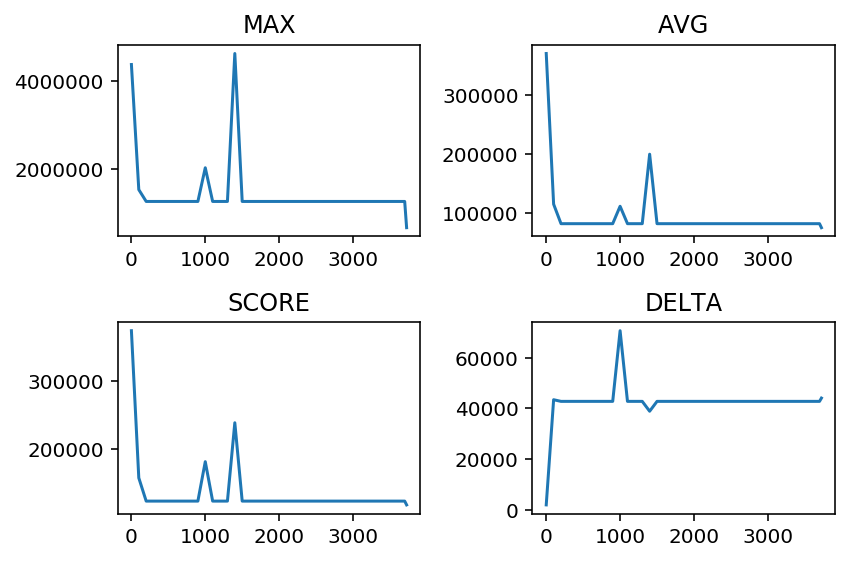

In [19]:
visualize_results(O.results)

In [20]:
# show_results('results_2020_05_18 06_22_47')